In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
stage1 = pd.read_csv('/Users/wuling31715/code/ai-cup-2020/datasets/stage1/SampleData_deid.csv')
stage2 = pd.read_csv('/Users/wuling31715/code/ai-cup-2020/datasets/stage2/train_1_update.csv')
stage4 = pd.read_csv('/Users/wuling31715/code/ai-cup-2020/datasets/stage4/train_2.csv')

In [3]:
df = stage1.append(stage2).append(stage4)
df = df.drop_duplicates()
df = df.drop(columns=['text'])
df

,article_id,start_position,end_position,entity_text,entity_type
0,0,55,57,68,med_exam
1,0,66,68,68,med_exam
2,0,1264,1271,10.78公分,med_exam
3,0,1358,1361,三多路,location
4,0,1374,1378,長庚醫院,location
...,...,...,...,...,...
3826,199,36,39,1.7,med_exam
3827,199,40,43,1.7,med_exam
3828,199,48,51,9.0,med_exam
3829,199,53,56,1.7,med_exam


/Users/wuling31715/opt/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


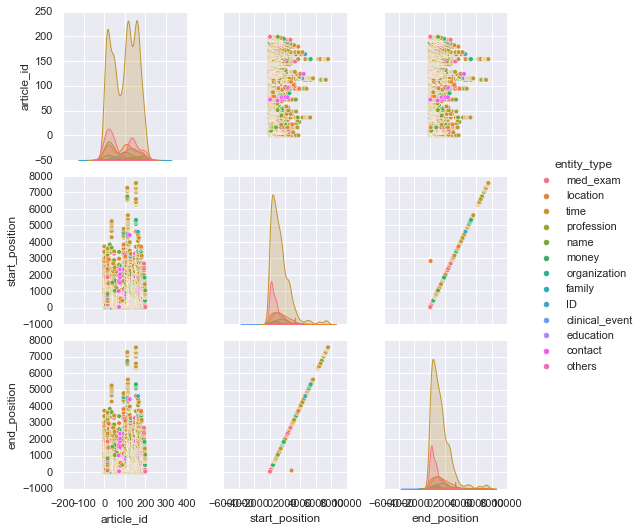

In [4]:
sns.pairplot(df, hue='entity_type');

In [5]:
entity_df = df.groupby("entity_type")['entity_text'].count().to_frame()
entity_df['percentage'] = ['{:4.2f}'.format((x / sum(entity_df['entity_text'].tolist())) * 100) for x in entity_df['entity_text'].tolist()]
entity_df['percentage'] = entity_df['percentage'].astype(float)
entity_df

,entity_text,percentage
entity_type,,
ID,21,0.47
clinical_event,5,0.11
contact,52,1.17
education,8,0.18
family,50,1.12
location,332,7.44
med_exam,513,11.50
money,160,3.59
name,315,7.06


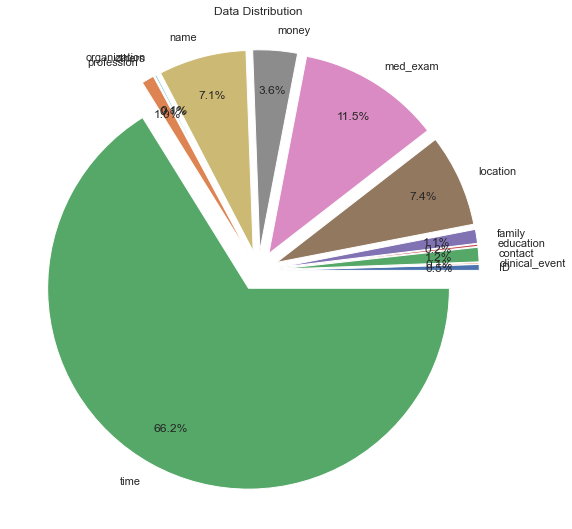

In [9]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[16, 9])
labels = entity_df.index
plt.pie(x=entity_df['entity_text'], autopct="%.1f%%", explode=[0.1]*len(entity_df), labels=labels, pctdistance=0.8)
plt.title("Data Distribution", fontsize=12);
pie.savefig("Seaborn_P_Chart.png")

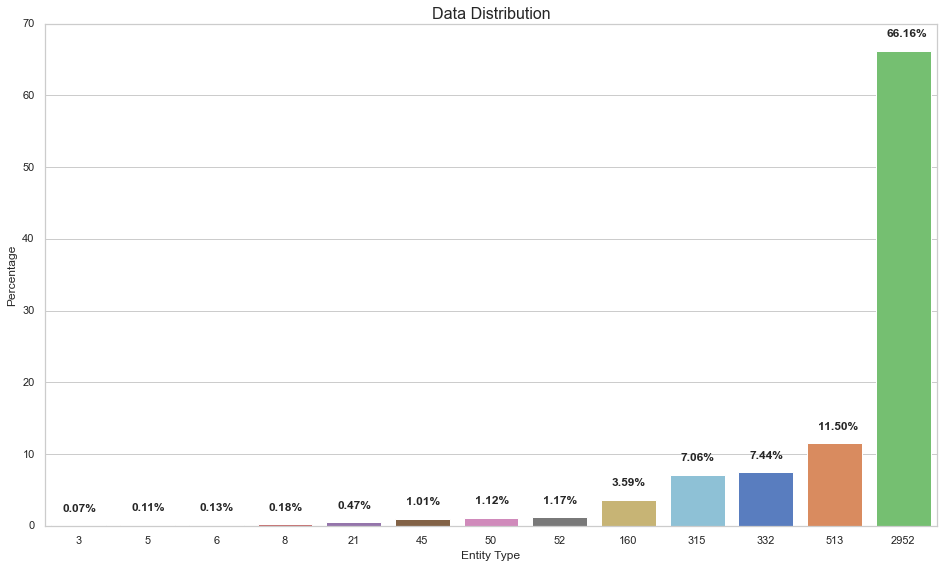

In [7]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16, 9))
ax = sns.barplot(x=entity_df.index, y=entity_df['percentage'], data=entity_df['entity_text'], ci=None, palette="muted",orient='v', )
ax.set_title("Data Distribution", fontsize=16)
ax.set_xlabel ("Entity Type")
ax.set_ylabel ("Percentage")
# calculate the percentages
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 5, rect.get_height() + 2, '{:4.2f}%'.format(rect.get_height()), weight='bold' )
    
bar.savefig("Seaborn_H_Chart.png");

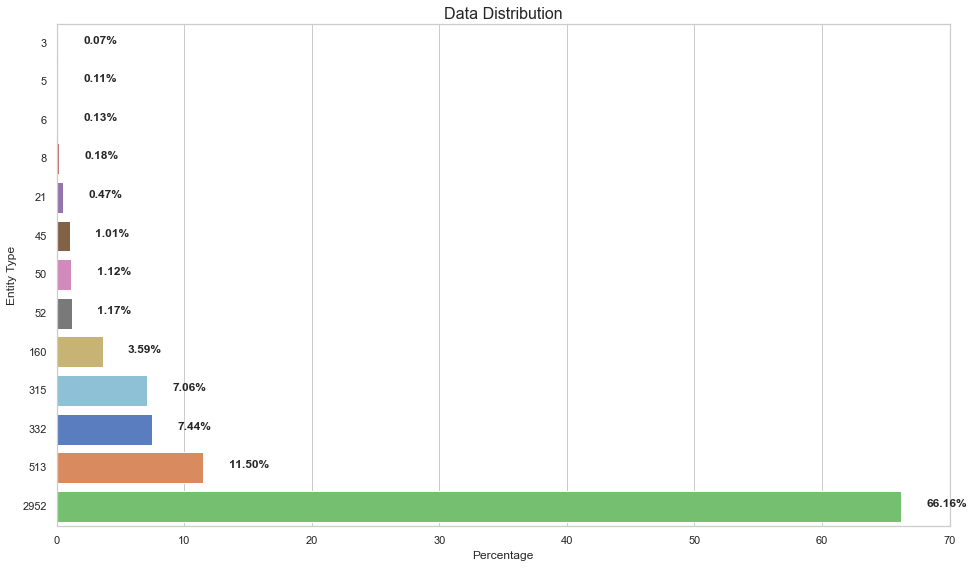

In [8]:
#Seaborn Horizontal barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16, 9))
ax = sns.barplot(x=entity_df['percentage'], y=entity_df.index, data=entity_df['entity_text'], ci=None, palette="muted",orient='h' )
ax.set_title("Data Distribution", fontsize=16)
ax.set_xlabel ("Percentage")
ax.set_ylabel ("Entity Type")
for rect in ax.patches:
    ax.text (rect.get_width() + 2, rect.get_y() + rect.get_height() / 2, '{:4.2f}%'.format(rect.get_width()), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");